# **Propuesta de proyecto**
Integrantes:
* Jhon Sebastian Cortes Vasquez - 2205199
* Didier Manuel Castro Vasquez - 2166672
* Luis Felipe Suarez Ramirez - 2201900

##Introducción
¿Cuál es el problema que abordara?

El problema que se abordará es la falta de iniciativas suficientes y efectivas para la prevención y detección temprana del cáncer de mama, con un enfoque en identificar los rangos de edad para las poblaciones que están en mayor riesgo de desarrollar esta enfermedad, La falta de enfoque en las edades más vulnerables puede resultar en diagnósticos tardíos y, por ende, en un mayor índice de mortalidad, lo que subraya la urgencia de abordar este problema.

¿Por que es importante?

Es importante porque el cáncer de mama es la principales causa de muerte entre las mujeres a nivel mundial. La detección temprana es clave para aumentar las tasas de supervivencia, ya que los tratamientos son más efectivos en las primeras etapas de la enfermedad; se pueden desarrollar estrategias más personalizadas y efectivas que maximicen la probabilidad de un diagnóstico temprano, reduciendo así la mortalidad y mejorando la calidad de vida de las mujeres en estos grupos de edad específicos.

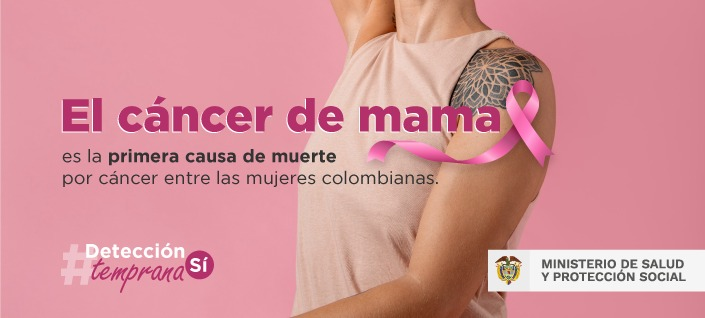

##Visualización de los datos y seleccion de las Variables exploratorias

El Dataset propuesto para este ejercicio es de una ips en salud que se encarga de prestar el servicio de mamografia digital y brindar un resultado a la paciente, con este objetivo el dataset contiene informacion demográfica, clínica y de contacto, así como detalles específicos del estudio mamográfico realizado. Este dataset se compone de la siguiente estructura:


1. CONSECUTIVO: Número único que identifica de manera consecutiva cada registro en el dataset.

2. Numero Acceso: Código único asignado a cada mamografía, utilizado para su acceso y referencia en el sistema.

3. Cedula: Número de identificación personal (cédula de ciudadanía o de extranjería).

4. Primer Apellido: Primer apellido del paciente.

5. Segundo Apellido: Segundo apellido del paciente.

6. Primer Nombre: Primer nombre del paciente.

7. Segundo Nombre: Segundo nombre del paciente (si lo tiene).

8. Sexo: Género del paciente (En este Caso femenino en su totalidad).

9. Ano: Año de nacimiento del paciente.

10. Mes: Mes de nacimiento del paciente.

11. Dia: Día de nacimiento del paciente.

12. RH: Factor Rh del paciente (positivo o negativo).

13. Edad: Edad del paciente en el momento de la toma de la mamografía.

14. Fecha Nacimiento: Fecha completa de nacimiento del paciente.

15. Tipo De Estudio: Tipo de estudio mamográfico realizado.

16. Entidad: Institución o entidad responsable de la realización del estudio.

17. Nombre Completo: Nombre completo del paciente (concatenación de nombre(s) y apellido(s)).

18. BI-RADS: Categoría del BI-RADS asignada tras la evaluación de la mamografía (sistema de clasificación que indica el nivel de sospecha de malignidad).

19. Fecha Estudio: Fecha en que se realizó la mamografía.

20. Ano Estudio: Año en que se realizó la mamografía.

21. Direccion: Dirección residencial del paciente.

22. Telefono: Número de teléfono de contacto del paciente.

### Imports y Carga de los Datos

In [41]:
#!pip install -q pyspark
#!pip install -q findspark

In [42]:
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql.functions import lit
import pyspark.sql.window as W
import pyspark.sql.types as T
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import when, col
from pyspark.sql.types import IntegerType
from pyspark.ml.feature import Bucketizer

In [43]:
spark = SparkSession.builder.appName("AED PySpark").getOrCreate()
spark

In [44]:
#from google.colab import drive
#drive.mount('/content/drive')

In [45]:
df = spark.read.csv('DATASETFINAL.csv',sep=';', header=True, inferSchema=True)
print('Shape of the dataset: ', (df.count(), len(df.columns)))# Imprime las dimensiones del DataFrame (número de filas y columnas)
df = df.withColumn("cedula", lit("****"))# Reemplaza el contenido de la columna "cedula" con la cadena "****" para anonimizar los datos
df = df.withColumn("Direccion", lit("****"))# Reemplaza el contenido de la columna "Direccion" con la cadena "****" para anonimizar la dirección
df = df.withColumn("Telefono", lit("****"))# Reemplaza el contenido de la columna "Telefono" con la cadena "****" para anonimizar el teléfono
df.show(n=10)# Muestra las primeras 10 filas del DataFrame

Shape of the dataset:  (45698, 22)
+-----------+-------------+------+---------------+----------------+-------------+--------------+----+----+---+---+---+----+----------------+--------------------+---------+--------------------+-------+-------------+-----------+---------+--------+
|CONSECUTIVO|Numero Acceso|cedula|Primer Apellido|Segundo Apellido|Primer Nombre|Segundo Nombre|Sexo| Ano|Mes|Dia| RH|Edad|Fecha Nacimiento|     Tipo De Estudio|  Entidad|     Nombre Completo|BI-RADS|Fecha Estudio|Ano Estudio|Direccion|Telefono|
+-----------+-------------+------+---------------+----------------+-------------+--------------+----+----+---+---+---+----+----------------+--------------------+---------+--------------------+-------+-------------+-----------+---------+--------+
|          1|         NULL|  ****|         OSPINA|          ZAPATA|       GLORIA|      PATRICIA|   F|1969|  3|  5| O+|  50|       5/03/1969|MAMOGRAFIA BILATERAL|NUEVA EPS|GLORIA PATRICIA O...|      3|   18/09/2019|       2019| 

In [46]:
df.columns # Muestra una lista con los nombres de todas las columnas del DataFrame df

['CONSECUTIVO',
 'Numero Acceso',
 'cedula',
 'Primer Apellido',
 'Segundo Apellido',
 'Primer Nombre',
 'Segundo Nombre',
 'Sexo',
 'Ano',
 'Mes',
 'Dia',
 'RH',
 'Edad',
 'Fecha Nacimiento',
 'Tipo De Estudio',
 'Entidad',
 'Nombre Completo',
 'BI-RADS',
 'Fecha Estudio',
 'Ano Estudio',
 'Direccion',
 'Telefono']

In [47]:
df.printSchema()# Imprime el esquema del DataFrame, mostrando los nombres de las columnas y los tipos de datos asociados

root
 |-- CONSECUTIVO: integer (nullable = true)
 |-- Numero Acceso: string (nullable = true)
 |-- cedula: string (nullable = false)
 |-- Primer Apellido: string (nullable = true)
 |-- Segundo Apellido: string (nullable = true)
 |-- Primer Nombre: string (nullable = true)
 |-- Segundo Nombre: string (nullable = true)
 |-- Sexo: string (nullable = true)
 |-- Ano: integer (nullable = true)
 |-- Mes: integer (nullable = true)
 |-- Dia: integer (nullable = true)
 |-- RH: string (nullable = true)
 |-- Edad: integer (nullable = true)
 |-- Fecha Nacimiento: string (nullable = true)
 |-- Tipo De Estudio: string (nullable = true)
 |-- Entidad: string (nullable = true)
 |-- Nombre Completo: string (nullable = true)
 |-- BI-RADS: string (nullable = true)
 |-- Fecha Estudio: string (nullable = true)
 |-- Ano Estudio: integer (nullable = true)
 |-- Direccion: string (nullable = false)
 |-- Telefono: string (nullable = false)



#### Imputaciones

In [48]:
def faltantes(df): # Define una función que calcula la cantidad de valores faltantes (nulos) en cada columna del DataFrame df
  falta = df.select([F.sum(F.col(c).isNull().cast('int')).alias(c) for c in df.columns]) #calculo para ver cantidad de valores nulos
  return falta.show() # Muestra el resultado, que es un DataFrame con la cantidad de valores nulos por columna

faltantes(df) # Llama a la función faltantes para mostrar la cantidad de valores nulos en cada columna del DataFrame df

+-----------+-------------+------+---------------+----------------+-------------+--------------+----+---+---+---+---+----+----------------+---------------+-------+---------------+-------+-------------+-----------+---------+--------+
|CONSECUTIVO|Numero Acceso|cedula|Primer Apellido|Segundo Apellido|Primer Nombre|Segundo Nombre|Sexo|Ano|Mes|Dia| RH|Edad|Fecha Nacimiento|Tipo De Estudio|Entidad|Nombre Completo|BI-RADS|Fecha Estudio|Ano Estudio|Direccion|Telefono|
+-----------+-------------+------+---------------+----------------+-------------+--------------+----+---+---+---+---+----+----------------+---------------+-------+---------------+-------+-------------+-----------+---------+--------+
|          0|         6458|     0|              1|            5844|            0|         11075|  10|  0|  0|  0| 51|  37|               0|              0|      0|              0|      0|            0|          0|        0|       0|
+-----------+-------------+------+---------------+----------------+-

Este paso se realizó para identificar la cantidad de valores faltantes o nulos en cada columna del DataFrame. Los valores faltantes son importantes de identificar porque pueden distorsionar el análisis y los resultados si no se manejan adecuadamente.

In [49]:
# Cuenta el número de filas en el DataFrame df donde la columna 'Sexo' tiene valores nulos
df.select('Sexo').filter(col('Sexo').isNull()).count()

# Reemplaza los valores nulos en la columna 'Sexo' con 'F'
df = df.withColumn(
    'Sexo',
    when(col('Sexo').isNull(), 'F').otherwise(col('Sexo'))
)

Dado que este es un dataset de mamografías, donde todos los pacientes son mujeres, se identificaron los registros con valores nulos en la columna 'Sexo'. Se reemplazaron estos valores por 'F' (femenino) para asegurar la coherencia en los datos.

In [50]:
# Verificar cuántos valores faltantes hay en la columna 'Edad'
df.select('Edad').filter(col('Edad').isNull()).count()

# Calcular la edad donde 'Edad' es nulo, usando la diferencia entre 'Ano Estudio' y 'Ano'
df = df.withColumn(
    'Edad',
    when(col('Edad').isNull(), col('Ano Estudio') - col('Ano')).otherwise(col('Edad'))
)

Para abordar los valores faltantes en la columna 'Edad', se verificó cuántos registros tenían esta información incompleta. Luego, se calculó la edad aproximada para estos registros restando el año de nacimiento ('Ano') al año en que se realizó el estudio ('Ano Estudio'). Este cálculo permite completar los valores faltantes en la columna 'Edad'

In [51]:
def faltantes(df):
  falta = df.select([F.sum(F.col(c).isNull().cast('int')).alias(c) for c in df.columns])
  return falta.show()

faltantes(df)

+-----------+-------------+------+---------------+----------------+-------------+--------------+----+---+---+---+---+----+----------------+---------------+-------+---------------+-------+-------------+-----------+---------+--------+
|CONSECUTIVO|Numero Acceso|cedula|Primer Apellido|Segundo Apellido|Primer Nombre|Segundo Nombre|Sexo|Ano|Mes|Dia| RH|Edad|Fecha Nacimiento|Tipo De Estudio|Entidad|Nombre Completo|BI-RADS|Fecha Estudio|Ano Estudio|Direccion|Telefono|
+-----------+-------------+------+---------------+----------------+-------------+--------------+----+---+---+---+---+----+----------------+---------------+-------+---------------+-------+-------------+-----------+---------+--------+
|          0|         6458|     0|              1|            5844|            0|         11075|   0|  0|  0|  0| 51|   0|               0|              0|      0|              0|      0|            0|          0|        0|       0|
+-----------+-------------+------+---------------+----------------+-

Se volvio a imprimir los valores nulos para verficar que si se hayan remplazado con las imputaciones

### Visualizacion Grafico de Pares de los Datos numericos

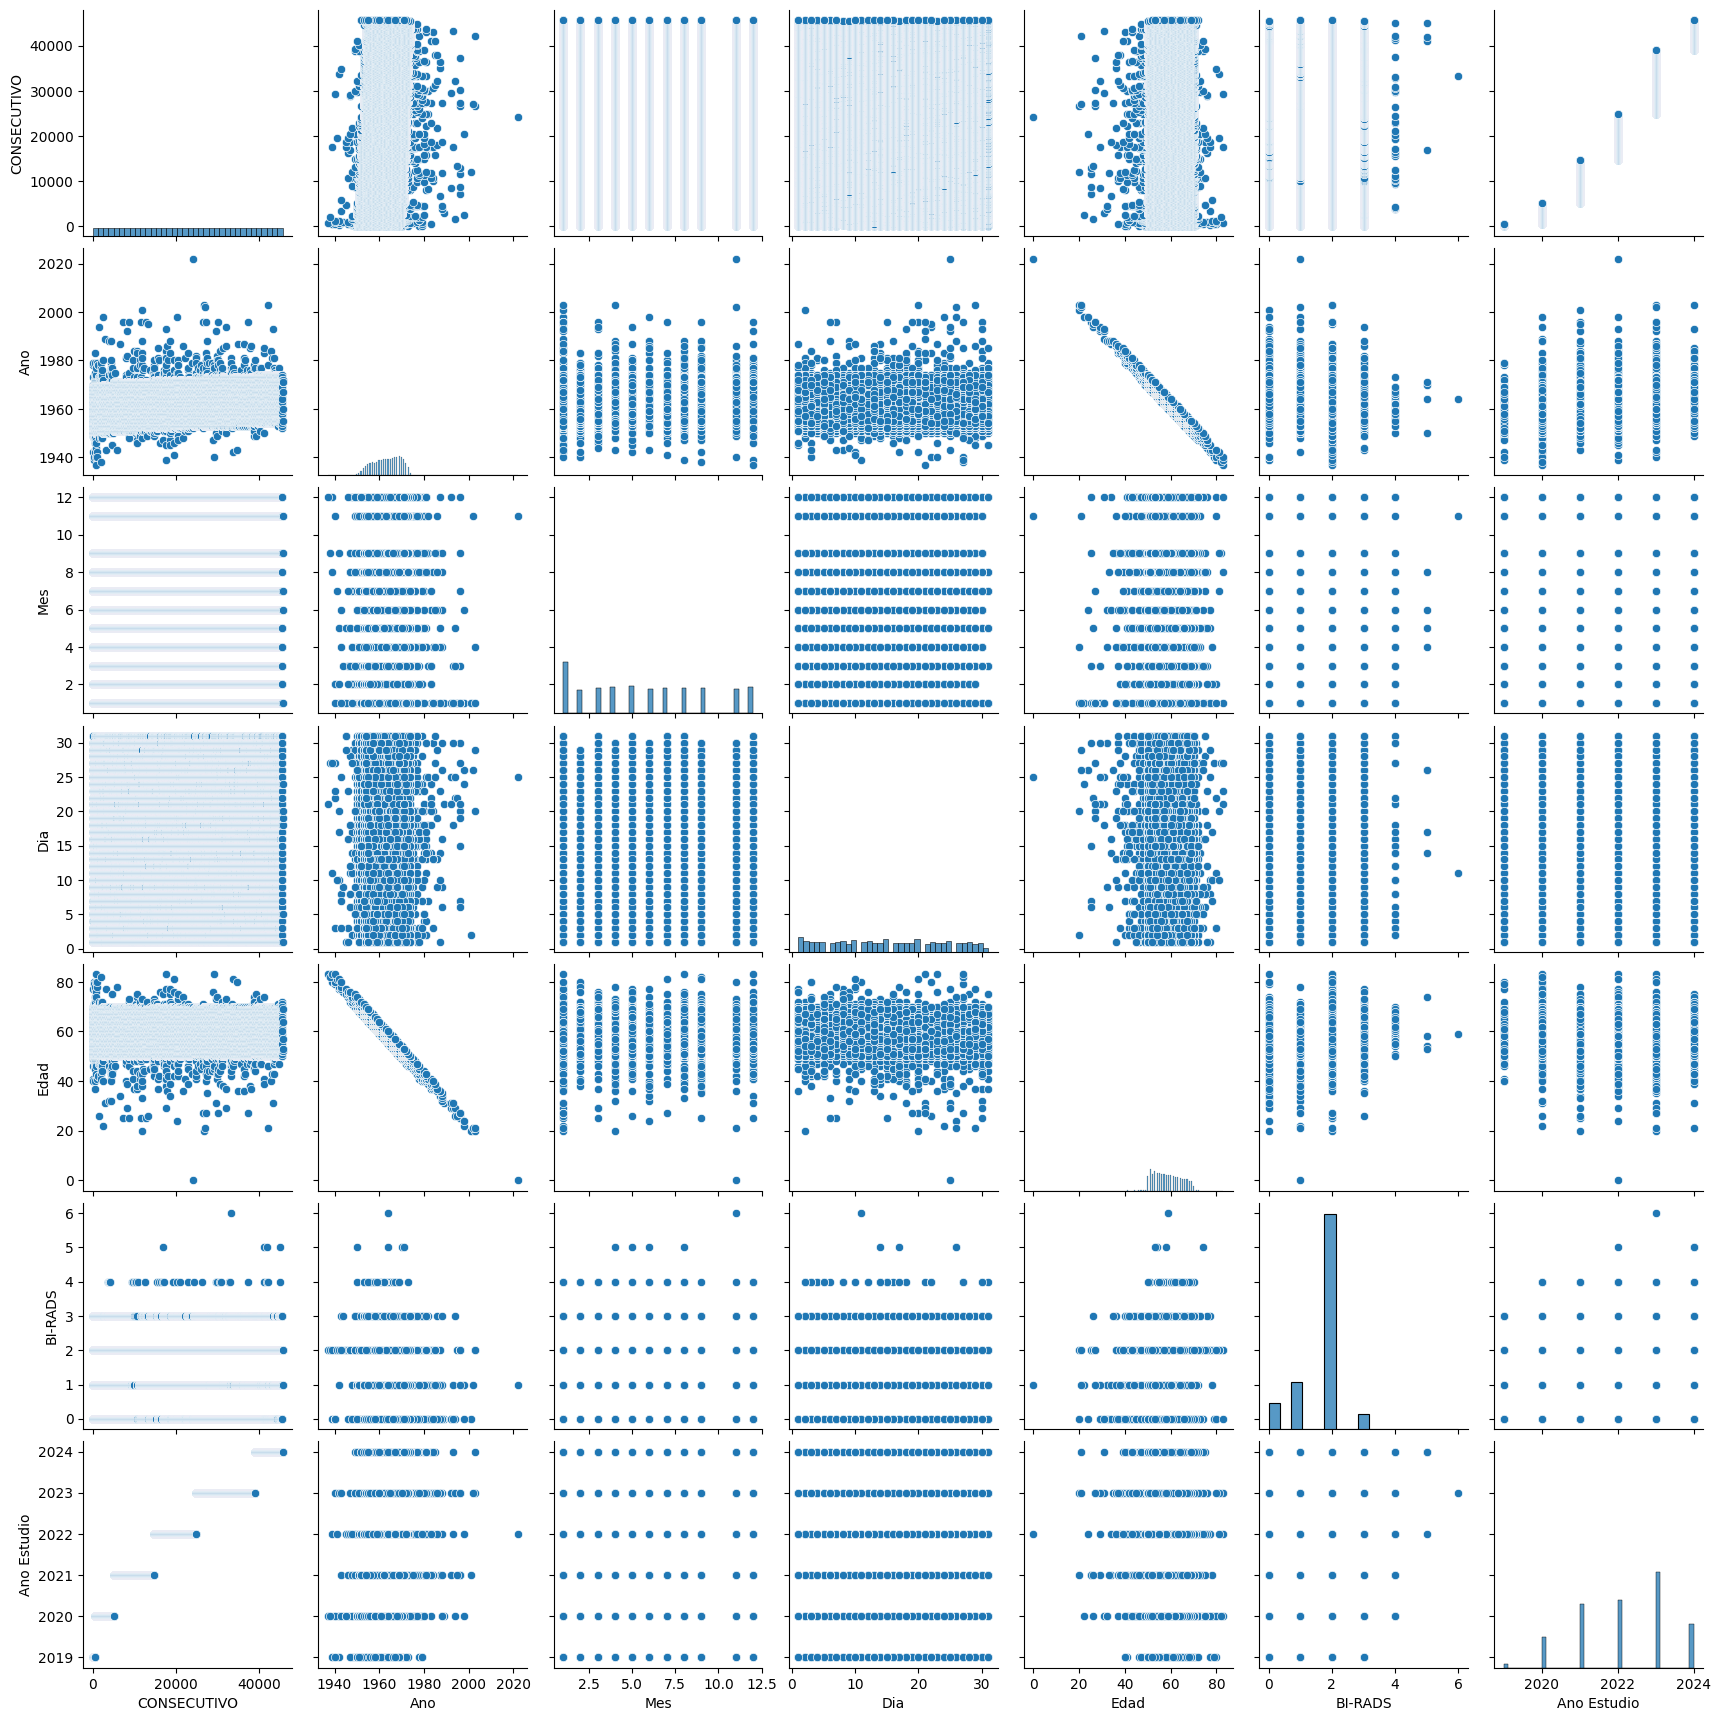

In [52]:
df1 = df.withColumn("BI-RADS", col("BI-RADS").cast(IntegerType()))# Convierte la columna "BI-RADS" del DataFrame df a tipo entero

df1 = df1.toPandas()# Convierte el DataFrame df1 de Spark a un DataFrame de pandas para realizar análisis y visualizaciones en pandas
sns.pairplot(df1)# Crea una matriz de gráficos de dispersión (pairplot) para todas las columnas numéricas en el DataFrame de pandas df1
plt.show()# Muestra los gráficos generados por seaborn

En este paso, primero se convirtió la columna "BI-RADS" a tipo entero, ya que la clasificación BI-RADS es un valor numérico discreto que debe ser manejado como tal para facilitar el análisis y las visualizaciones. Luego, se convirtió el DataFrame de Spark a un DataFrame de pandas para realizar visualizaciones con seaborn. Se utilizó un gráfico de dispersión múltiple (pairplot) para visualizar las relaciones entre todas las variables numéricas, lo cual es útil para identificar correlaciones potenciales entre las variables del dataset.

### Exploracion de Datos

#### Seleccion de Caracteristicas

In [53]:
# Elimina varias columnas del DataFrame df para crear un nuevo DataFrame df_f1 con solo las columnas restantes
df_f1 = df.drop('CONSECUTIVO','Numero Acceso','cedula', 'Primer Apellido','Segundo Apellido','Primer Nombre','Segundo Nombre','Sexo','Ano', 'Mes','Dia','RH','Fecha Nacimiento','Tipo De Estudio','Nombre Completo','Direccion','Telefono', 'Fecha Estudio')
df_f1.show(n=10)# Muestra las primeras 10 filas del DataFrame df_f1 resultante

+----+---------+-------+-----------+
|Edad|  Entidad|BI-RADS|Ano Estudio|
+----+---------+-------+-----------+
|  50|NUEVA EPS|      3|       2019|
|  61|NUEVA EPS|      2|       2019|
|  55|NUEVA EPS|      2|       2019|
|  54|NUEVA EPS|      1|       2019|
|  69|NUEVA EPS|      2|       2019|
|  70|NUEVA EPS|      1|       2019|
|  68|NUEVA EPS|      2|       2019|
|  66|NUEVA EPS|      2|       2019|
|  63|NUEVA EPS|      1|       2019|
|  58|NUEVA EPS|      2|       2019|
+----+---------+-------+-----------+
only showing top 10 rows



se eliminaron varias columnas del DataFrame original que contenían datos personales, redundantes o irrelevantes para el análisis. Esto incluyó información como nombres, cédulas, fechas, y datos de contacto, que no aportan valor en el análisis de las mamografías y la clasificación BI-RADS.

In [54]:
df_f1.columns # Devuelve una lista de los nombres de las columnas en el DataFrame df_f1

['Edad', 'Entidad', 'BI-RADS', 'Ano Estudio']

Confirmación de variables restantes.

In [55]:
# Agrupa el DataFrame df_f1 por la columna "BI-RADS" y cuenta el número de ocurrencias para cada categoría en "BI-RADS"
Birads_salud = df_f1.groupBy("BI-RADS").count()
# Ordena los resultados del DataFrame Birads_salud por la columna "count" en orden descendente y muestra el resultado
Birads_salud.orderBy(col("count").desc()).show()

+-------+-----+
|BI-RADS|count|
+-------+-----+
|      2|32359|
|      1| 7083|
|      0| 3871|
|      3| 2218|
|     4B|  100|
|      4|   37|
|     4A|   22|
|      5|    4|
|     4C|    3|
|      6|    1|
+-------+-----+



El DataFrame se agrupa por la columna "BI-RADS" y se cuenta el número de ocurrencias de cada categoría, luego se ordenaron los resultados en orden descendente según el número de ocurrencias para ver qué categorías de BI-RADS son más frecuentes en el conjunto de datos. Esta información ayuda a comprender la distribución de los diagnósticos .

In [56]:
columns_to_integer = ['BI-RADS']# Lista de columnas que se desea convertir al tipo entero

# Itera sobre cada columna en la lista columns_to_integer
for column in columns_to_integer:
  df_f1 = df_f1.withColumn(column, col(column).cast(T.IntegerType()))# Convierte la columna actual a tipo entero

df_f1.printSchema() # Muestra el esquema del DataFrame df_f1 después de la conversión de tipos de datos
df_f1.show() # Muestra las primeras filas del DataFrame df_f1 para verificar los cambios realizados

root
 |-- Edad: integer (nullable = true)
 |-- Entidad: string (nullable = true)
 |-- BI-RADS: integer (nullable = true)
 |-- Ano Estudio: integer (nullable = true)

+----+---------+-------+-----------+
|Edad|  Entidad|BI-RADS|Ano Estudio|
+----+---------+-------+-----------+
|  50|NUEVA EPS|      3|       2019|
|  61|NUEVA EPS|      2|       2019|
|  55|NUEVA EPS|      2|       2019|
|  54|NUEVA EPS|      1|       2019|
|  69|NUEVA EPS|      2|       2019|
|  70|NUEVA EPS|      1|       2019|
|  68|NUEVA EPS|      2|       2019|
|  66|NUEVA EPS|      2|       2019|
|  63|NUEVA EPS|      1|       2019|
|  58|NUEVA EPS|      2|       2019|
|  63|NUEVA EPS|      1|       2019|
|  62|NUEVA EPS|      1|       2019|
|  56|NUEVA EPS|      2|       2019|
|  46|NUEVA EPS|      1|       2019|
|  68|NUEVA EPS|      1|       2019|
|  67|NUEVA EPS|      1|       2019|
|  61|NUEVA EPS|      1|       2019|
|  57|NUEVA EPS|      3|       2019|
|  52|NUEVA EPS|      1|       2019|
|  70|NUEVA EPS|    

Se convirtió la columna "BI-RADS" a tipo entero para asegurar que los datos están en el formato adecuado para su análisis y visualización, y se mostraron las primeras filas del DataFrame para comprobar que los cambios fueron efectivos.

In [57]:
# Agrupa el DataFrame df_f1 por la columna "Entidad" y cuenta el número de ocurrencias para cada valor en "Entidad"
entidades_salud = df_f1.groupBy("Entidad").count()

# Ordena los resultados del DataFrame entidades_salud por la columna "count" en orden descendente y muestra el resultado
entidades_salud.orderBy(col("count").desc()).show()

+--------------------+-----+
|             Entidad|count|
+--------------------+-----+
|            EMSSANAR|23719|
|        EPS COOSALUD| 6828|
|         ASMET SALUD| 3756|
|            SINERGIA| 2626|
|    FUNDACION PROPAL| 2589|
|            MEDICIPS| 1844|
|          COMFENALCO| 1801|
|VERSALLES SAN MARCOS| 1172|
|         EPS SANITAS|  729|
|           NUEVA EPS|  373|
|RED DE SALUD SURO...|   83|
|          COMFACAUCA|   82|
|     HOSPITAL PILOTO|   34|
|    FCEC LAURA LENIS|   32|
|   CLINICA LOS ANDES|   27|
|       IPS MANANTIAL|    2|
|            CORTESIA|    1|
+--------------------+-----+



Se contó el número de ocurrencias para cada entidad, posteriormente los resultados fueron ordenados en orden descendente por el conteo, lo que permite identificar rápidamente cuáles son las entidades más representadas en el conjunto de datos.

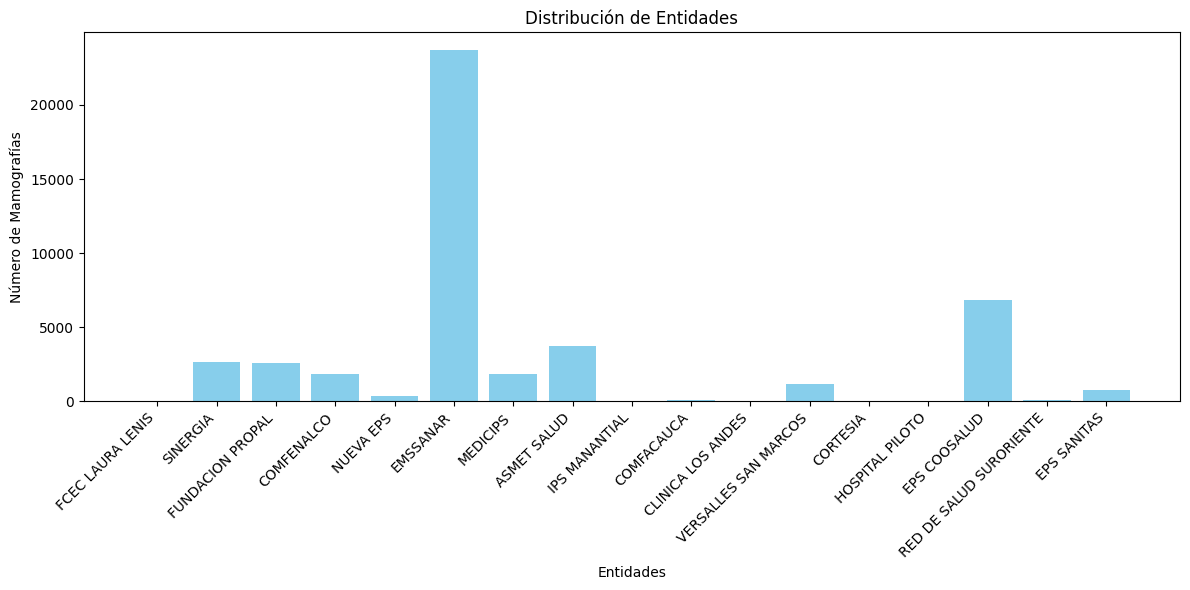

In [58]:
# Crear una lista con los labels y tamaños para el gráfico
labels = [row['Entidad'] for row in entidades_salud.select('Entidad').collect()]
sizes = [row['count'] for row in entidades_salud.select('count').collect()]

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(labels, sizes, color='skyblue')

# Personalizar el gráfico
plt.xlabel('Entidades')
plt.ylabel('Número de Mamografías')
plt.title('Distribución de Entidades')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas en el eje x para mejor legibilidad

# Mostrar el gráfico
plt.tight_layout()  # Ajustar los márgenes
plt.show()


Este gráfico de barras nos permité visualizar de manera clara y efectiva la distribución de las entidades en el conjunto de datos de mamografías.

In [59]:
# Reemplaza los valores de la columna "Entidad" en df_f1 con códigos numéricos específicos para cada entidad
df_f1 = df_f1.withColumn(
    "Entidad",
    when(col("Entidad") == "EMSSANAR", 1)
    .when(col("Entidad") == "EPS COOSALUD", 2)
    .when(col("Entidad") == "ASMET SALUD", 3)
    .when(col("Entidad") == "SINERGIA", 4)
    .when(col("Entidad") == "FUNDACION PROPAL", 5)
    .when(col("Entidad") == "MEDICIPS", 6)
    .when(col("Entidad") == "COMFENALCO", 7)
    .when(col("Entidad") == "VERSALLES SAN MARCOS", 8)
    .when(col("Entidad") == "EPS SANITAS", 9)
    .when(col("Entidad") == "NUEVA EPS", 10)
    .when(col("Entidad") == "RED DE SALUD SURORIENTE", 11)
    .when(col("Entidad") == "COMFACAUCA", 12)
    .when(col("Entidad") == "HOSPITAL PILOTO", 13)
    .when(col("Entidad") == "FCEC LAURA LENIS", 14)
    .when(col("Entidad") == "CLINICA LOS ANDES", 15)
    .when(col("Entidad") == "IPS MANANTIAL", 16)
    .when(col("Entidad") == "CORTESIA", 17)
    .otherwise(col("Entidad"))
)
# Muestra las primeras filas del DataFrame df_f1 para verificar los cambios realizados en la columna "Entidad"
df_f1.show()


+----+-------+-------+-----------+
|Edad|Entidad|BI-RADS|Ano Estudio|
+----+-------+-------+-----------+
|  50|     10|      3|       2019|
|  61|     10|      2|       2019|
|  55|     10|      2|       2019|
|  54|     10|      1|       2019|
|  69|     10|      2|       2019|
|  70|     10|      1|       2019|
|  68|     10|      2|       2019|
|  66|     10|      2|       2019|
|  63|     10|      1|       2019|
|  58|     10|      2|       2019|
|  63|     10|      1|       2019|
|  62|     10|      1|       2019|
|  56|     10|      2|       2019|
|  46|     10|      1|       2019|
|  68|     10|      1|       2019|
|  67|     10|      1|       2019|
|  61|     10|      1|       2019|
|  57|     10|      3|       2019|
|  52|     10|      1|       2019|
|  70|     10|      2|       2019|
+----+-------+-------+-----------+
only showing top 20 rows



Este paso es fundamental porque estamos transformando las categorías textuales de la columna "Entidad" en códigos numéricos. Esta transformación es importante ya que facilita el análisis y la modelación de datos

In [60]:
#los Bi-rads nullos que son 4a,4b,4c los volvemos 4 para que todo sea númerico
df_f1 = df_f1.na.fill(4, subset=['BI-RADS'])

# Agrupa el DataFrame df_f1 por la columna 'BI-RADS' y cuenta el número de ocurrencias para cada valor en 'BI-RADS'
Birads_salud = df_f1.groupBy("BI-RADS").count()

# Ordena los resultados del DataFrame Birads_salud por la columna 'BI-RADS' en orden ascendente y muestra el resultado
Birads_salud.orderBy(col("BI-RADS")).show()

+-------+-----+
|BI-RADS|count|
+-------+-----+
|      0| 3871|
|      1| 7083|
|      2|32359|
|      3| 2218|
|      4|  162|
|      5|    4|
|      6|    1|
+-------+-----+



En este bloque de código, rellenamos los valores nulos en la columna "BI-RADS" con el valor 4 para unificar categorías y asegurar la coherencia en los datos, esto se realizo porque en cualquiera de los casos de subcategorias de 4a, 4b y 4c el paso a seguir es biopsia, por eso se tomo como un grupo entero (4).

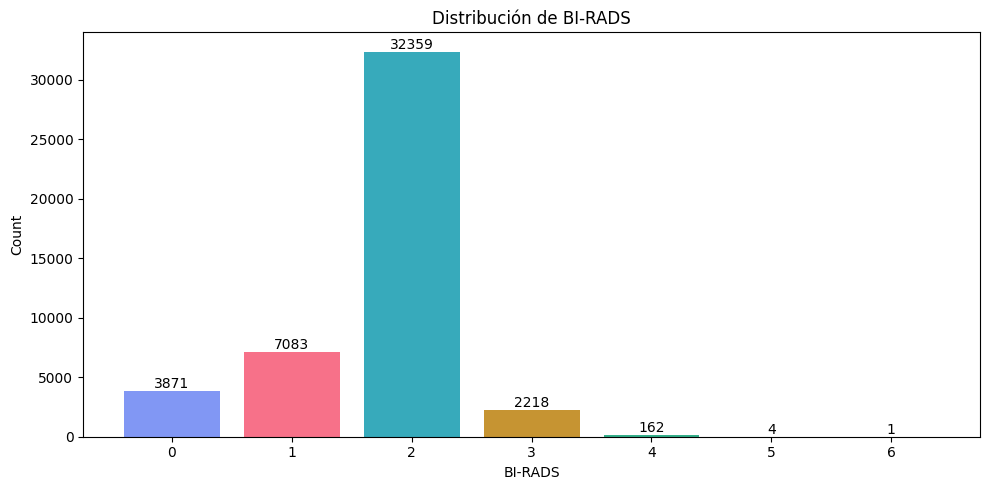

In [61]:
# Crear una lista de etiquetas y valores para el gráfico de barras
labels = [row['BI-RADS'] for row in Birads_salud.select('BI-RADS').collect()]
sizes = [row['count'] for row in Birads_salud.select('count').collect()]

# Usar una paleta de colores con Seaborn
colors = sns.color_palette("husl", len(labels))

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
bars = plt.bar(labels, sizes, color=colors)

# Etiquetas de los ejes
plt.xlabel('BI-RADS')
plt.ylabel('Count')
plt.title('Distribución de BI-RADS')

# Agregar los valores (contadores) en la parte superior de cada barra
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.1,
             f'{int(bar.get_height())}', ha='center', va='bottom', color='black')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


El gráfico de barras muestra la distribución de las clasificaciones BI-RADS obtenidas de las mamografías analizadas, este gráfico es crucial para entender la prevalencia de las diferentes clasificaciones BI-RADS en nuestro conjunto de datos. Una mayor cantidad de casos en categorías específicas podría sugerir un mayor riesgo de cáncer o la necesidad de más seguimiento médico para esas categorías.

C:\Users\Didier\AppData\Local\Temp\ipykernel_9160\4061075072.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Edad_counts_pd["Edad_buckets"], y=Edad_counts_pd["count"], palette='viridis')


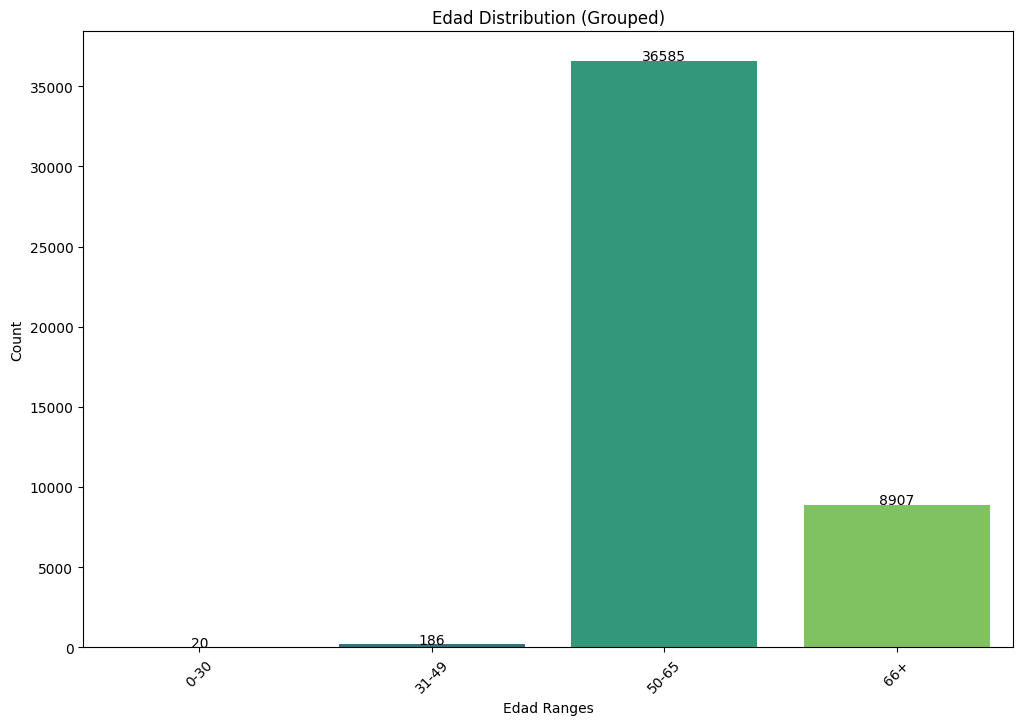

In [62]:
# Definimos los rangos de edad para los "buckets" o intervalos
splits = [0, 30, 49, 65, float('inf')]

# Creamos el objecto y generamos la nueva
bucketizer = Bucketizer(splits=splits, inputCol="Edad", outputCol="Edad_buckets")

# Aplicamos el Bucketizer al DataFrame df_f1 para transformar la columna "Edad" en intervalos definidos
df_f1 = bucketizer.setHandleInvalid("keep").transform(df_f1)

# Agrupamos el DataFrame por los intervalos de edad y contamos el número de registros en cada intervalo
Edad_counts = df_f1.groupBy("Edad_buckets").count().orderBy("Edad_buckets")

# Convertimos el DataFrame de PySpark a un DataFrame de Pandas para facilitar la visualización con Matplotlib y Seaborn
Edad_counts_pd = Edad_counts.toPandas()

# Definimos las etiquetas para el eje x
labels = ["0-30", "31-49", "50-65", "66+"]

# Configuramos el tamaño de la figura del gráfico
plt.figure(figsize=(12, 8))

# Creamos el gráfico de barras con Seaborn usando las etiquetas personalizadas para el eje x
sns.barplot(x=Edad_counts_pd["Edad_buckets"], y=Edad_counts_pd["count"], palette='viridis')

# Añadimos etiquetas a cada barra en el gráfico (opcional)
for i, v in enumerate(Edad_counts_pd["count"]):
    plt.text(i, v + 15, str(v), ha='center', fontsize=10)

# Añadimos título y etiquetas a los ejes
plt.title('Edad Distribution (Grouped)')
plt.xlabel('Edad Ranges')
plt.ylabel('Count')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45) # Configuramos las etiquetas personalizadas para el eje x
plt.show()

Este gráfico es fundamental para nuestro análisis, ya que nos permite observar cómo se distribuyen los pacientes según su edad en el conjunto de datos de mamografías. Identificar la prevalencia de ciertos rangos etarios puede ser crucial para entender patrones en los resultados de las mamografías y en la detección temprana del cáncer de mama.

### Mapa de Correlacion

In [63]:
# Convertimos el DataFrame de PySpark df_f1 a un DataFrame de Pandas para facilitar la manipulación y visualización con bibliotecas de gráficos de Python
df_f1 = df_f1.toPandas()

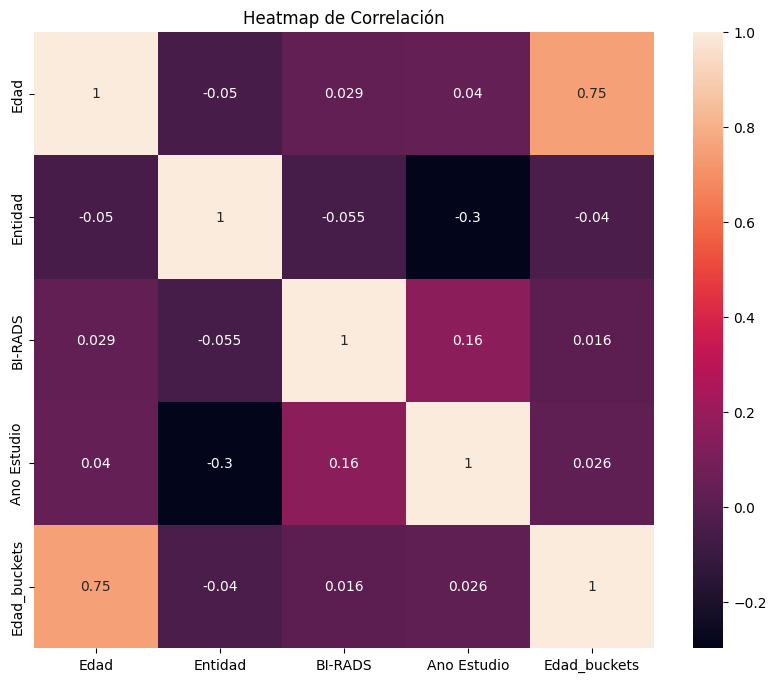

In [64]:
# Visualización de la matriz de correlación para entender la relación entre variables.
plt.figure(figsize=(10, 8))
sns.heatmap(df_f1.corr(), annot=True)
plt.title('Heatmap de Correlación')
plt.show()

Este gráfico es fundamental en nuestro análisis, ya que nos ayuda a identificar qué variables pueden estar relacionadas y podrían influir en los resultados de nuestros estudios.

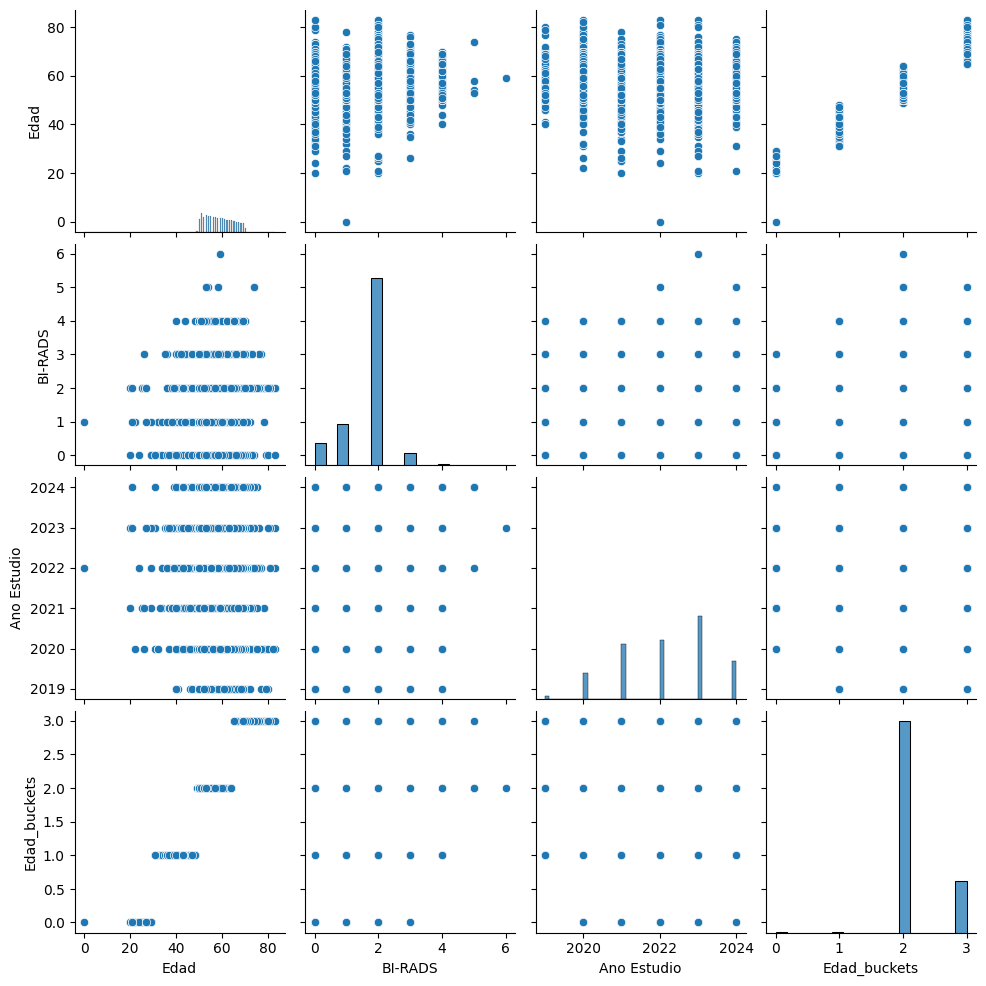

In [66]:
# Usamos Seaborn para crear una matriz de gráficos de dispersión (pairplot)
sns.pairplot(df_f1)
plt.show()

Este grafico nos ayuda a identificar relaciones que podrían no ser evidentes a partir de análisis univariantes y a detectar posibles outliers que podrían afectar los resultados. Además, nos permite enfocarnos en las variables que tienen mayor potencial para influir en la clasificación BI-RADS.

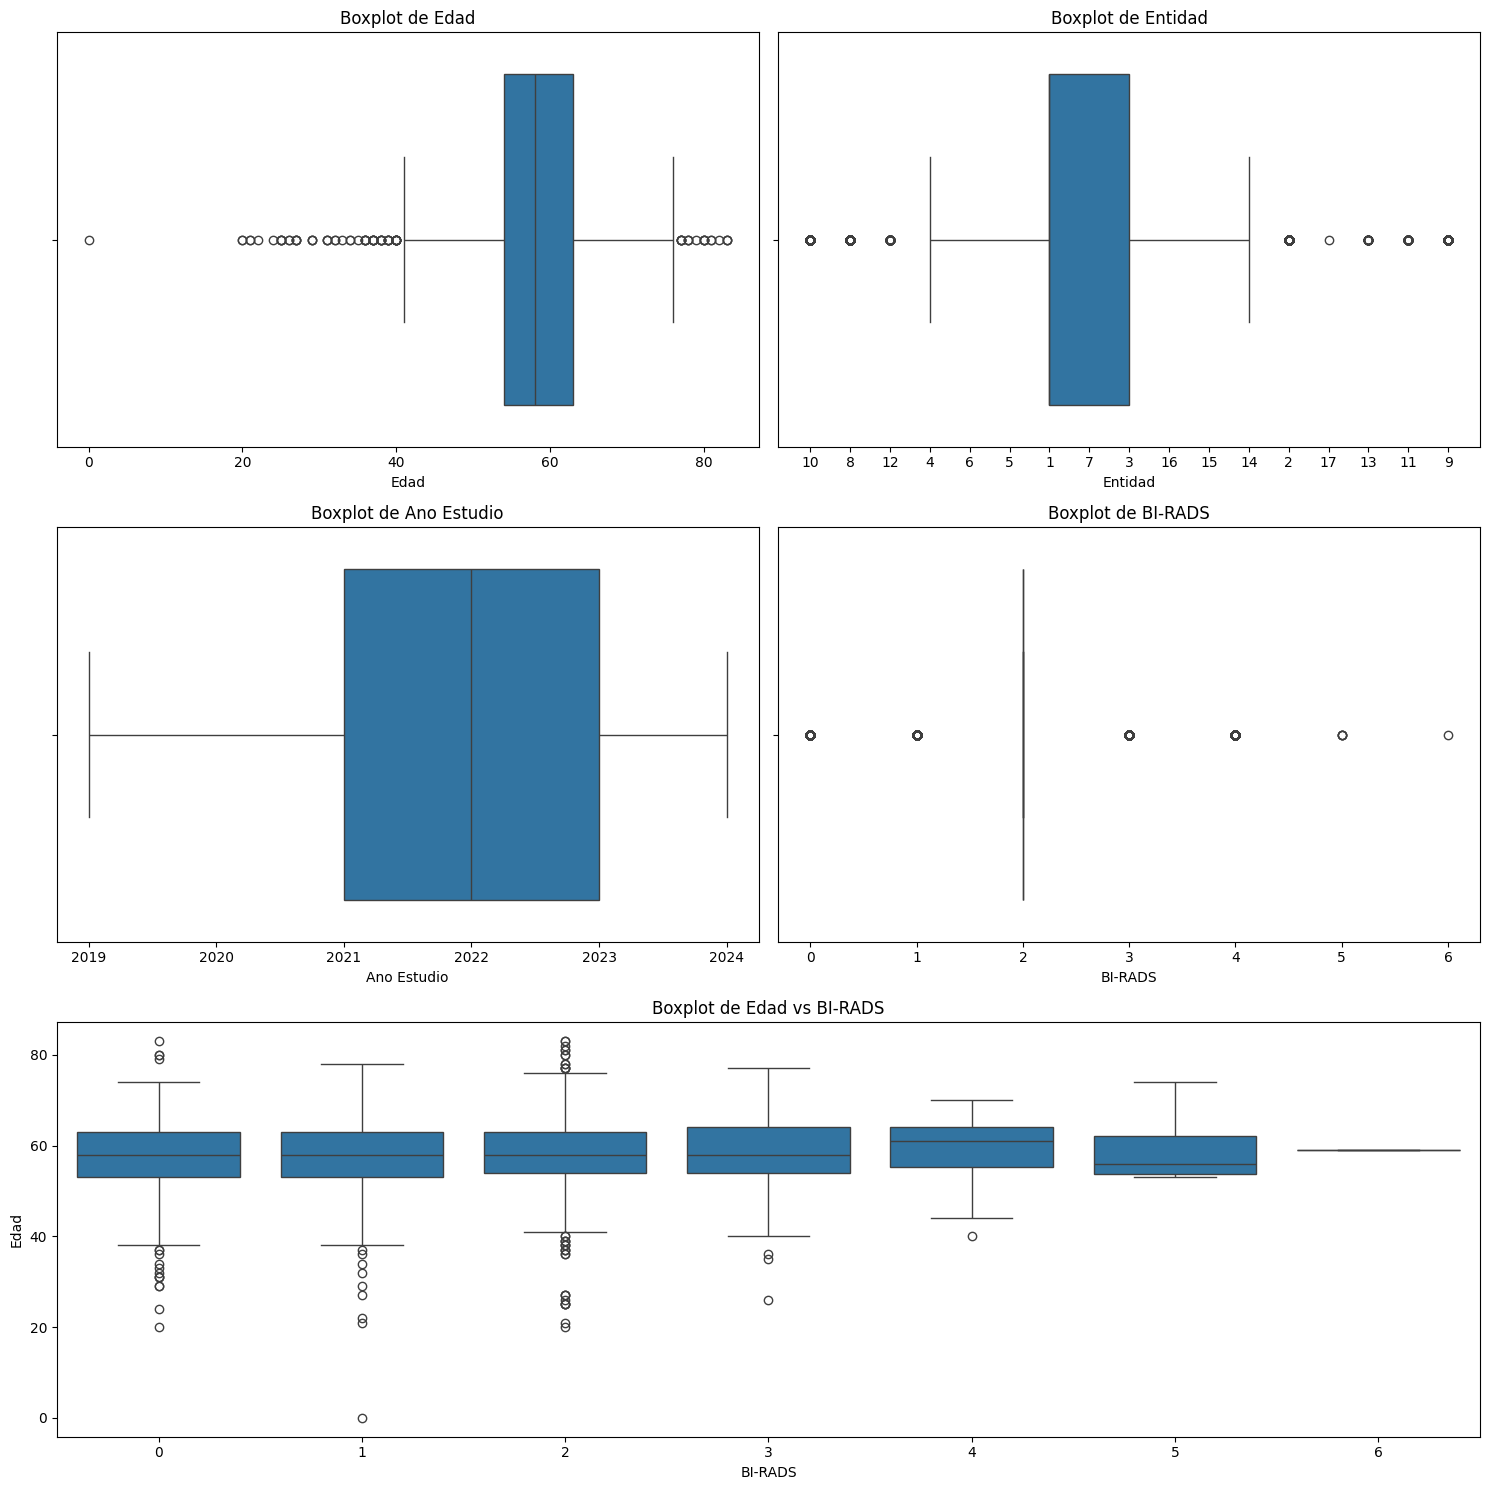

In [67]:
plt.figure(figsize=(15, 15))  # Aumenta el tamaño de la figura para acomodar los gráficos

# Primera fila
plt.subplot(3, 2, 1)
sns.boxplot(x='Edad', data=df_f1)
plt.title('Boxplot de Edad')

plt.subplot(3, 2, 2)
sns.boxplot(x='Entidad', data=df_f1)
plt.title('Boxplot de Entidad')

# Segunda fila
plt.subplot(3, 2, 3)
sns.boxplot(x='Ano Estudio', data=df_f1)
plt.title('Boxplot de Ano Estudio')

plt.subplot(3, 2, 4)
sns.boxplot(x='BI-RADS', data=df_f1)
plt.title('Boxplot de BI-RADS')

# Tercera fila (ocupa toda la fila)
plt.subplot(3, 2, (5, 6))
sns.boxplot(x='BI-RADS', y='Edad', data=df_f1)
plt.title('Boxplot de Edad vs BI-RADS')

plt.tight_layout()
plt.show()

Estos boxplots son esenciales para nuestro análisis, ya que nos proporcionan una visión clara de la distribución y las relaciones entre las variables. Nos ayudan a identificar patrones, tendencias y posibles anomalías en los datos, lo que puede guiar nuestras decisiones en los análisis posteriores y en la interpretación de los resultados.

In [68]:
#descrimos para ver por estadisticas la variable edad cuenta con un minimo de cero lo cual genera un valor atipico 
df_f1.describe()

,Edad,BI-RADS,Ano Estudio,Edad_buckets
count,45698.000000,45698.000000,45698.000000,45698.000000
mean,58.564095,1.731564,2022.157075,2.189965
std,5.838623,0.696876,1.257914,0.405768
min,0.000000,0.000000,2019.000000,0.000000
25%,54.000000,2.000000,2021.000000,2.000000
50%,58.000000,2.000000,2022.000000,2.000000
75%,63.000000,2.000000,2023.000000,2.000000
max,83.000000,6.000000,2024.000000,3.000000


In [69]:
# Calculamos el promedio de la columna 'edad' excluyendo los valores de 0
promedio_edad = df_f1.loc[df_f1['Edad'] > 0, 'Edad'].mean()

# Reemplazamos los valores 0 en 'edad' con el promedio calculado
df_f1['Edad'] = df_f1['Edad'].replace(0, promedio_edad)

df_f1.describe()

,Edad,BI-RADS,Ano Estudio,Edad_buckets
count,45698.000000,45698.000000,45698.000000,45698.000000
mean,58.565376,1.731564,2022.157075,2.189965
std,5.832192,0.696876,1.257914,0.405768
min,20.000000,0.000000,2019.000000,0.000000
25%,54.000000,2.000000,2021.000000,2.000000
50%,58.000000,2.000000,2022.000000,2.000000
75%,63.000000,2.000000,2023.000000,2.000000
max,83.000000,6.000000,2024.000000,3.000000


In [71]:
# Seleccionar columnas específicas
columnas_especificas = ['Edad', 'BI-RADS', 'Ano Estudio', 'Edad_buckets']

# Exportar a CSV
df_f1[columnas_especificas].to_csv('DATASETFINAL.csv', index=False)